In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
prices_d = pd.read_csv('/content/drive/My Drive/Algo project/drowzee_prices.csv')
print(prices_d.head())

Mounted at /content/drive
   timestamp  bid_price_1  bid_volume_1  bid_price_2  bid_volume_2  \
0          0         2028            30          NaN           NaN   
1          1         2030             4       2028.0          31.0   
2          2         2029             1       2028.0          21.0   
3          3         2029            25          NaN           NaN   
4          4         2029             2       2028.0          23.0   

   bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  ask_price_2  \
0          NaN           NaN         2032            30          NaN   
1          NaN           NaN         2032            31          NaN   
2          NaN           NaN         2032            22          NaN   
3          NaN           NaN         2032            25          NaN   
4          NaN           NaN         2030             6       2032.0   

   ask_volume_2  ask_price_3  ask_volume_3  
0           NaN          NaN           NaN  
1           NaN          NaN  

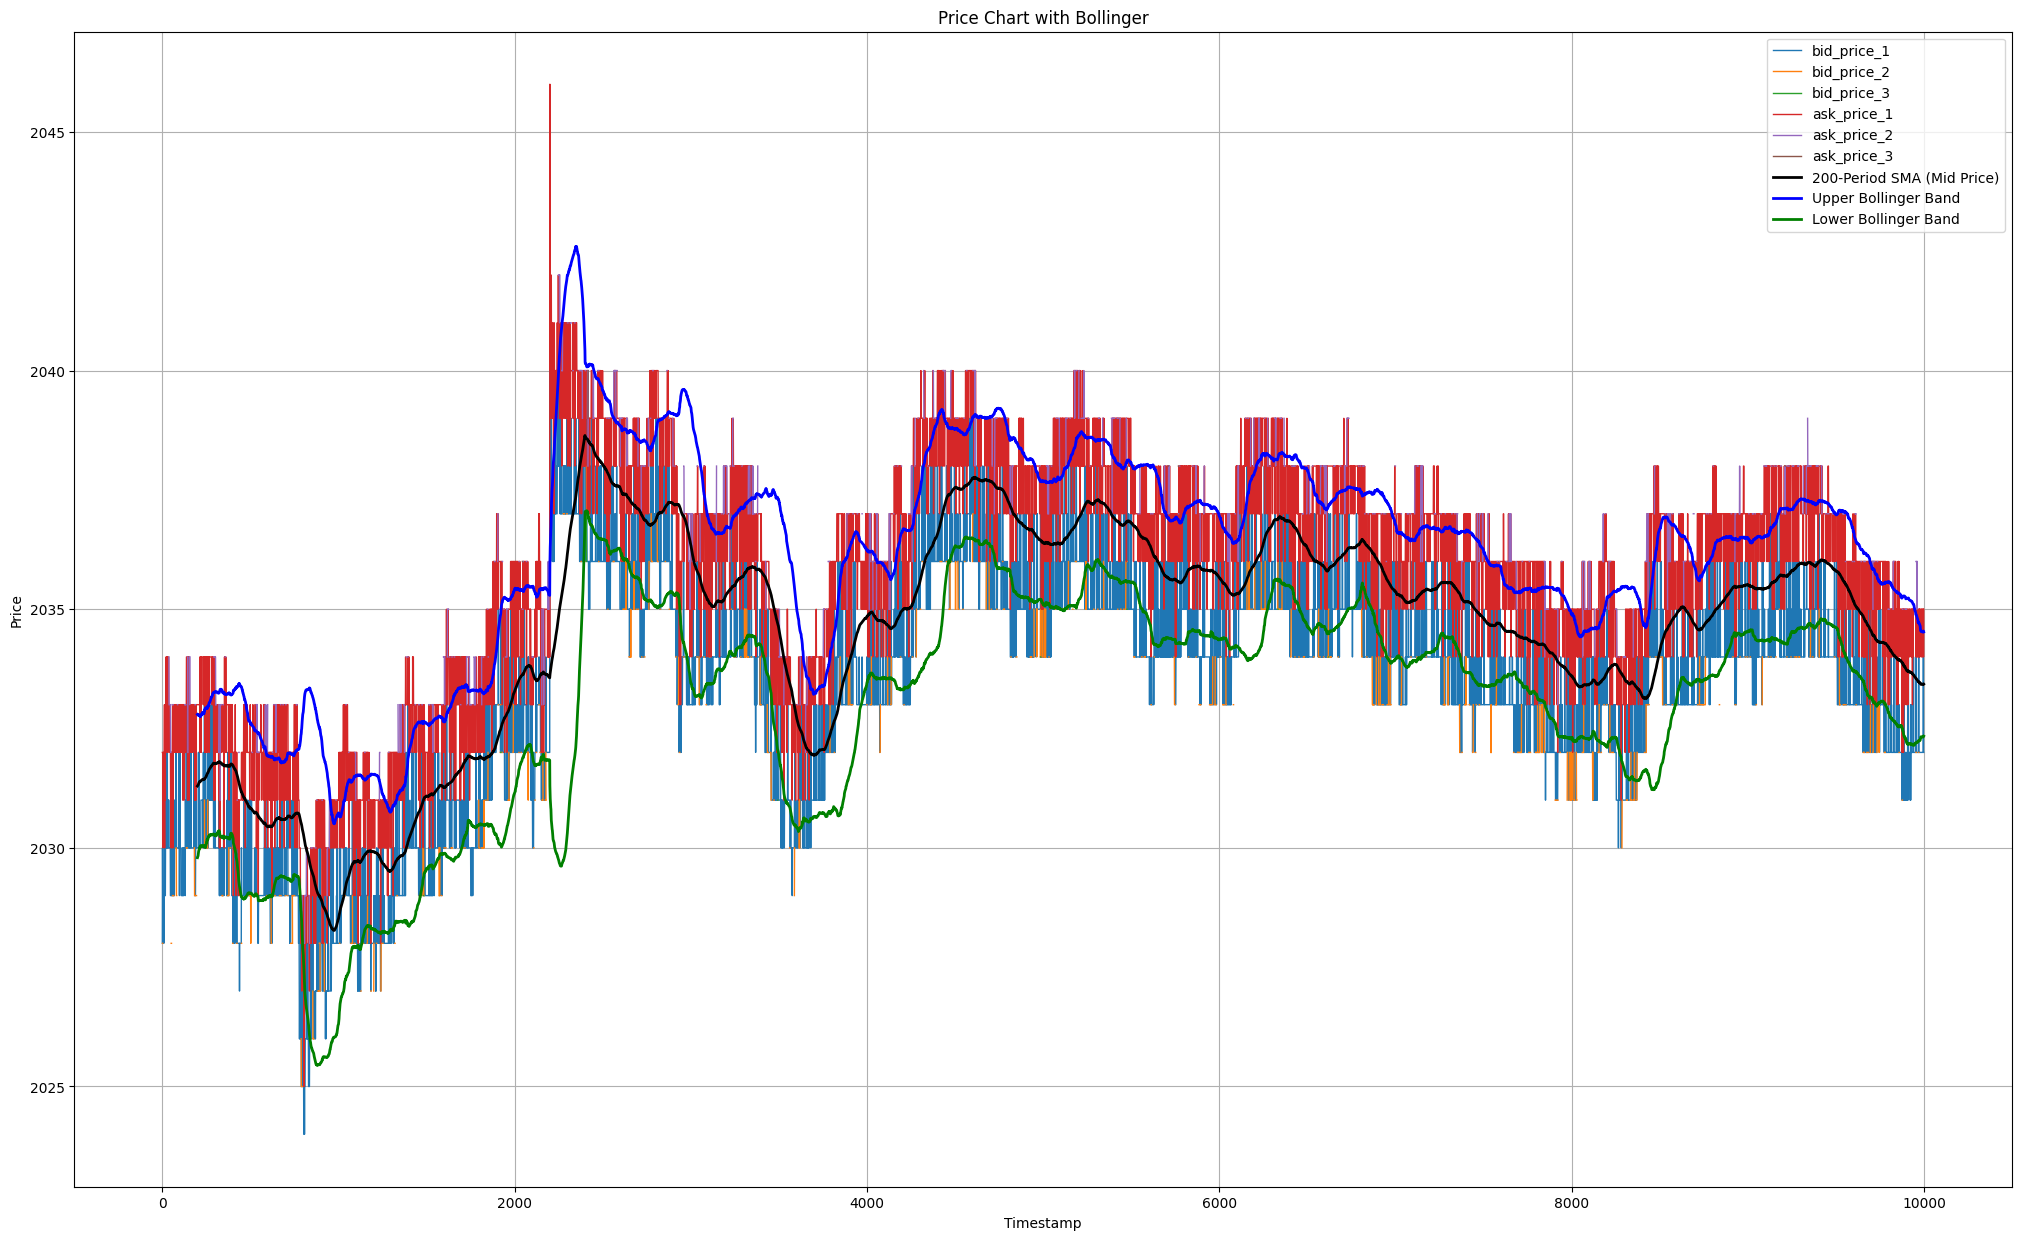

In [ ]:


# Extract columns

ts = prices_d['timestamp']
bp1 = prices_d['bid_price_1']
bp2 = prices_d['bid_price_2']
bp3 = prices_d['bid_price_3']
ap1 = prices_d['ask_price_1']
ap2 = prices_d['ask_price_2']
ap3 = prices_d['ask_price_3']


window_size = 200
std_mul = 2

# Calculate SMA on mid-price (average of best bid and best ask)
mid_price = (bp1 + ap1) / 2
sma = mid_price.rolling(window=window_size).mean()
rolling_std = mid_price.rolling(window=window_size).std()
upper_band = sma + std_mul * rolling_std
lower_band = sma - std_mul * rolling_std

# Plotting
plt.figure(figsize=(25, 15))
price_dict = {
    'bid_price_1': bp1,
    'bid_price_2': bp2,
    'bid_price_3': bp3,
    'ask_price_1': ap1,
    'ask_price_2': ap2,
    'ask_price_3': ap3,
}

# Plot bid and ask price levels
for label, price_series in price_dict.items():
    plt.plot(ts, price_series, label=label, linewidth=1)

# Plot SMA line
plt.plot(ts, sma, label=f'{window_size}-Period SMA (Mid Price)', color='black', linewidth=2)
plt.plot(ts, upper_band, label=f'Upper Bollinger Band', color='blue', linewidth=2)
plt.plot(ts, lower_band, label=f'Lower Bollinger Band', color='green', linewidth=2)

plt.title('Price Chart with Bollinger')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

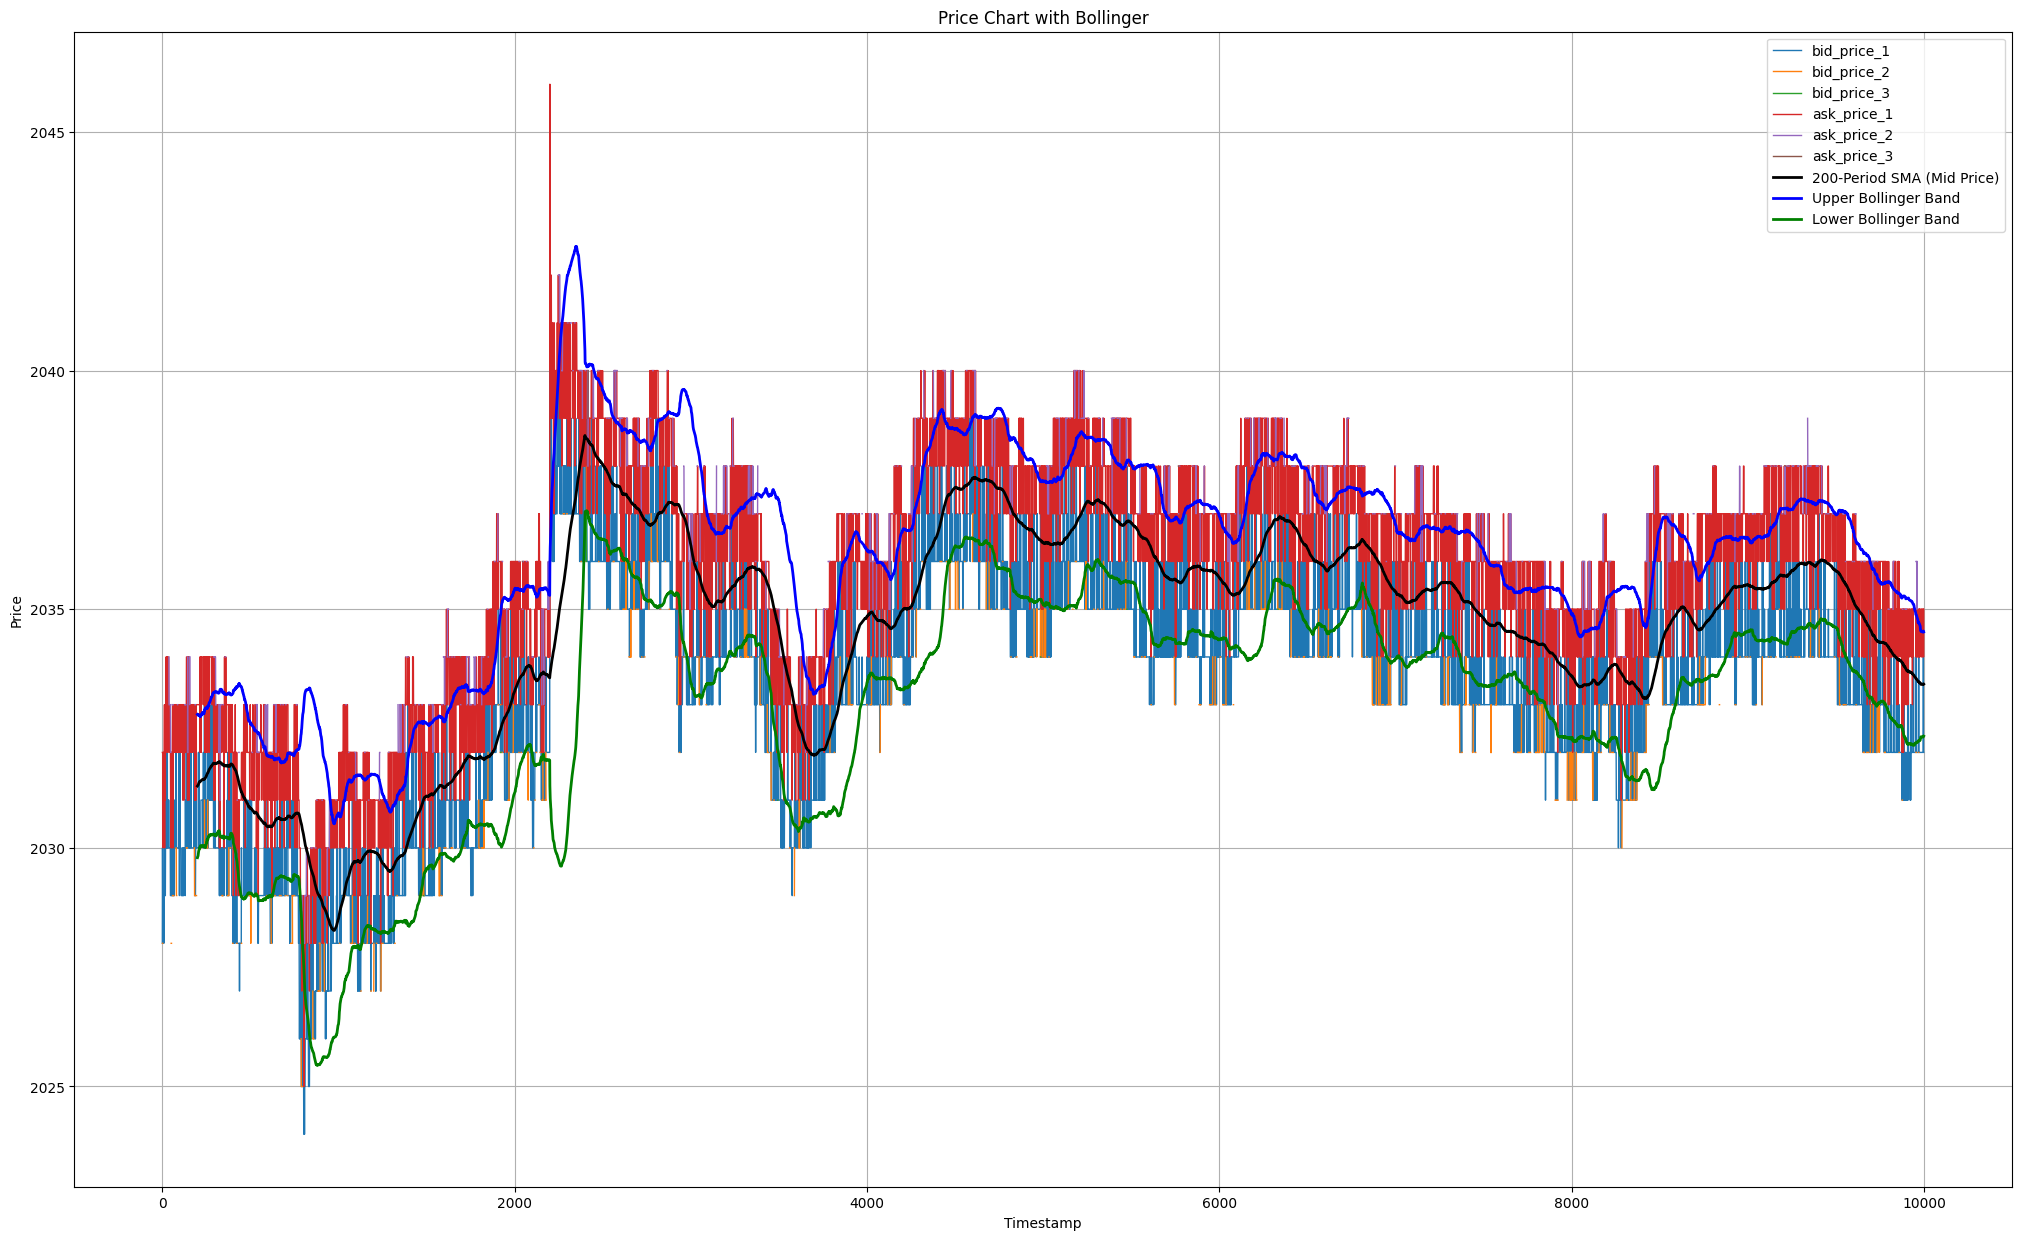

In [ ]:
# Extract columns
ts = prices_d['timestamp']
bp1 = prices_d['bid_price_1']
bp2 = prices_d['bid_price_2']
bp3 = prices_d['bid_price_3']
ap1 = prices_d['ask_price_1']
ap2 = prices_d['ask_price_2']
ap3 = prices_d['ask_price_3']


window_size = 200
std_mul = 2

# Calculate SMA on mid-price (average of best bid and best ask)
mid_price = (bp1 + ap1) / 2
sma = mid_price.rolling(window=window_size).mean()
rolling_std = mid_price.rolling(window=window_size).std()
upper_band = sma + std_mul * rolling_std
lower_band = sma - std_mul * rolling_std

# Plotting
plt.figure(figsize=(25, 15))
price_dict = {
    'bid_price_1': bp1,
    'bid_price_2': bp2,
    'bid_price_3': bp3,
    'ask_price_1': ap1,
    'ask_price_2': ap2,
    'ask_price_3': ap3,
}

# Plot bid and ask price levels
for label, price_series in price_dict.items():
    plt.plot(ts, price_series, label=label, linewidth=1)

# Plot SMA line
plt.plot(ts, sma, label=f'{window_size}-Period SMA (Mid Price)', color='black', linewidth=2)
plt.plot(ts, upper_band, label=f'Upper Bollinger Band', color='blue', linewidth=2)
plt.plot(ts, lower_band, label=f'Lower Bollinger Band', color='green', linewidth=2)

plt.title('Price Chart with Bollinger')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

This strategy assumes that prices tend to revert to the mean. It uses a moving average (mean) and standard deviation-based bands to define a normal price range. If price goes outside this range, it's expected to reverse.

🔍 Step-by-Step Core Logic
1. Track Mid-Prices
The strategy records the mid-price at every time step — which is simply the average of the best bid and best ask prices.

2. Calculate Bollinger Bands
Once it has enough price data (e.g., 200 data points):

It calculates the Simple Moving Average (SMA) of the mid-prices.

It computes the standard deviation over the same window.

Then it defines:

Upper Band = SMA + 2 × Standard Deviation

Lower Band = SMA − 2 × Standard Deviation

These bands represent a statistical envelope around the typical price.

3. Trading Signals Based on Band Breaches
If current mid-price ≤ lower band:

The price is considered oversold

→ Buy signal is triggered (buy at the best available ask price)

If current mid-price ≥ upper band:

The price is considered overbought

→ Sell signal is triggered (sell at the best available bid price)